# Taxonomic Comparisons

In [2]:
#install.packages("klaR",method="wget")
#install.packages("spdep",method="wget")
#install.packages("AlgDesign",method="wget")
#install.packages("agricolae",method="wget")
#install.packages("multcomp",method="wget")

library(agricolae)
library(multcomp)
library(repr)

In [15]:
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018",
                    "MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196",
                    "MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")

In [16]:
# Multiple comparisons: Tukey
library(agricolae)
tax_raw <- read.csv("~/Documents/UCDavis/dib/MMETSP/git/MMETSP/assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv")
#head(tax_raw)

In [17]:
tax_raw <- tax_raw[!tax_raw$SampleName %in% special_flowers,]
phylum_data <-tax_raw[,c(2,34,64,61,49,114,41,45,54)]
phylum <- phylum_data$Phylum
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
sub<-phylum_data[phylum_data$Phylum %in% sub_phy,]

In [18]:
# Multiple comparisons: Tukey
fit <- aov(Unique_kmers ~ Phylum,data=sub)
a<-HSD.test(fit,"Phylum",group=TRUE)
tuk<-glht(fit,linfct=mcp(Phylum="Tukey"))
summary(tuk)

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Unique_kmers ~ Phylum, data = sub)

Linear Hypotheses:
                                    Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  -4444270    2655908  -1.673  0.61547    
Ciliophora - Bacillariophyta == 0   10286090    3839172   2.679  0.09696 .  
Cryptophyta - Bacillariophyta == 0  14265105    4061448   3.512  0.00770 ** 
Dinophyta - Bacillariophyta == 0    33839427    2164529  15.634  < 0.001 ***
Haptophyta - Bacillariophyta == 0    5403678    2671886   2.022  0.38243    
Ochrophyta - Bacillariophyta == 0   -1296836    2504269  -0.518  0.99844    
Ciliophora - Chlorophyta == 0       14730360    4251006   3.465  0.00962 ** 
Cryptophyta - Chlorophyta == 0      18709375    4452772   4.202  < 0.001 ***
Dinophyta - Chlorophyta == 0        38283698    2831431  13.521  < 0.001 ***
Haptophyta - Chlorophyta == 0        9847948    323586

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

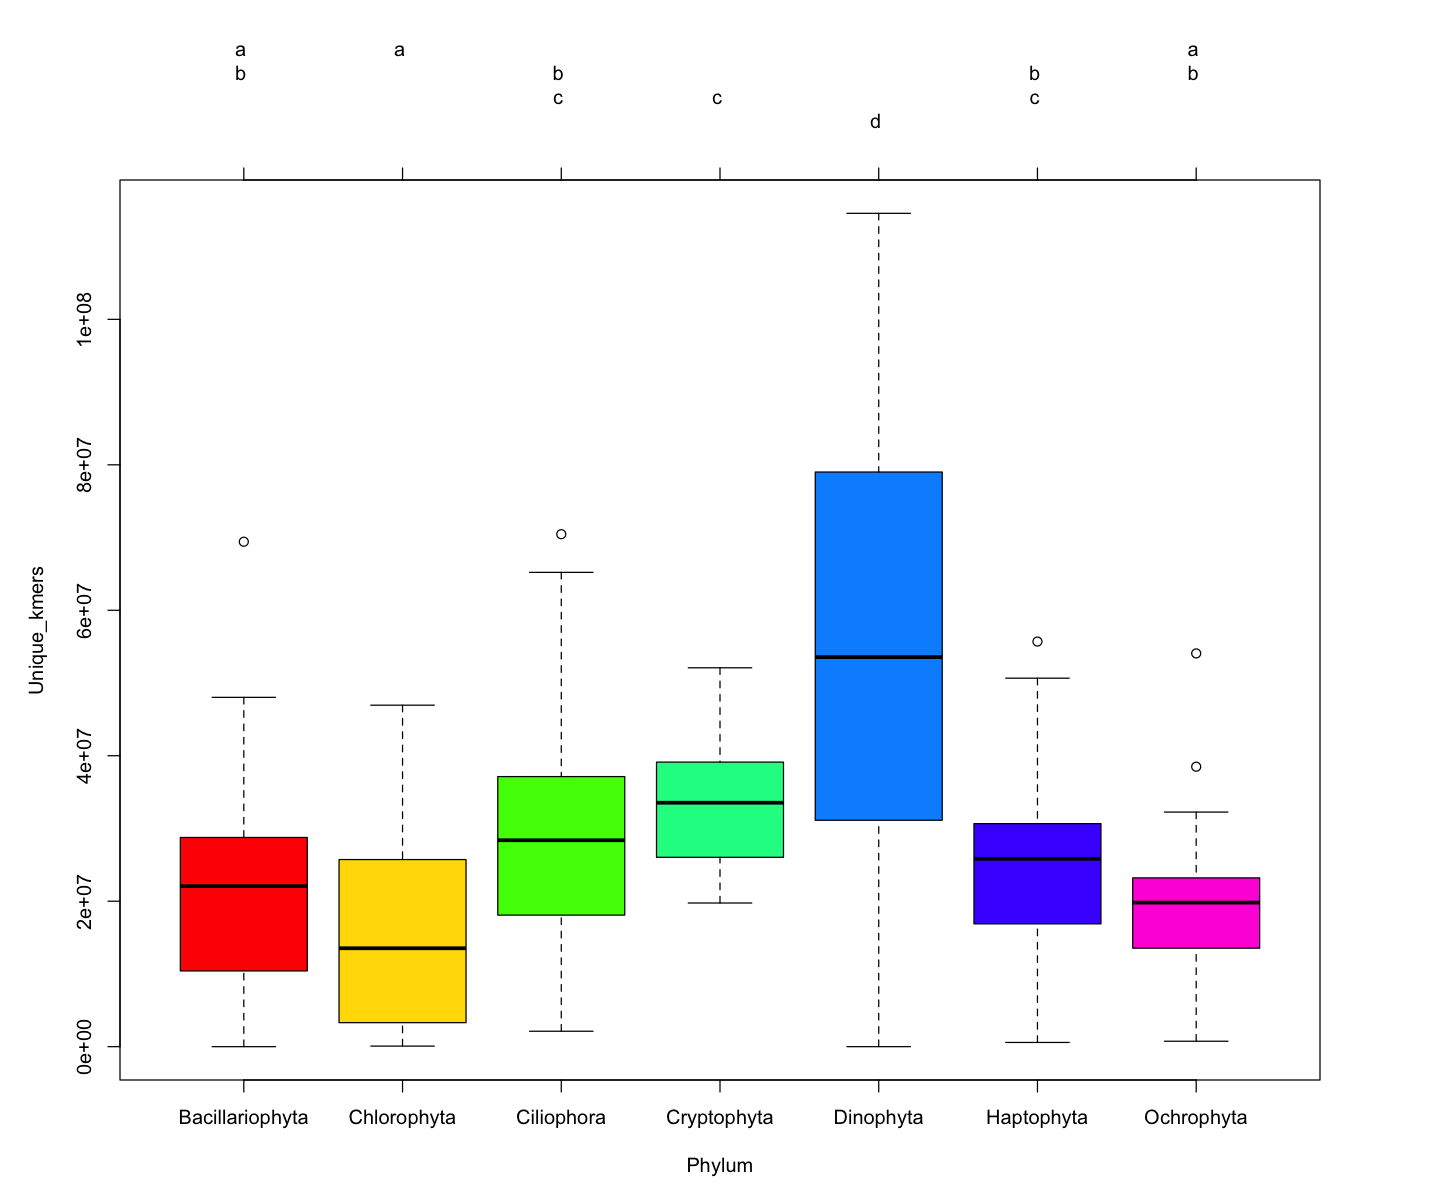

In [19]:
tuk.cld<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
plot(tuk.cld,col=rainbow(length(unique(sub$Phylum))))

In [20]:
fit2 <- aov(mean_orf_percent.x ~ Phylum,data=sub)
b<-TukeyHSD(fit2,"Phylum",conf.level=0.95)
tuk<-glht(fit2,linfct=mcp(Phylum="Tukey"))
summary(tuk)

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mean_orf_percent.x ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0   -0.818      1.104  -0.741  0.98886    
Ciliophora - Bacillariophyta == 0   -20.675      1.586 -13.036  < 0.001 ***
Cryptophyta - Bacillariophyta == 0    6.197      1.678   3.693  0.00424 ** 
Dinophyta - Bacillariophyta == 0     10.903      0.899  12.128  < 0.001 ***
Haptophyta - Bacillariophyta == 0     4.870      1.104   4.412  < 0.001 ***
Ochrophyta - Bacillariophyta == 0     3.106      1.034   3.002  0.04008 *  
Ciliophora - Chlorophyta == 0       -19.857      1.760 -11.281  < 0.001 ***
Cryptophyta - Chlorophyta == 0        7.015      1.843   3.805  0.00279 ** 
Dinophyta - Chlorophyta == 0         11.721      1.179   9.937  < 0.001 ***
Haptophyta - Chlorophyta == 0         5.688      1.342   4

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

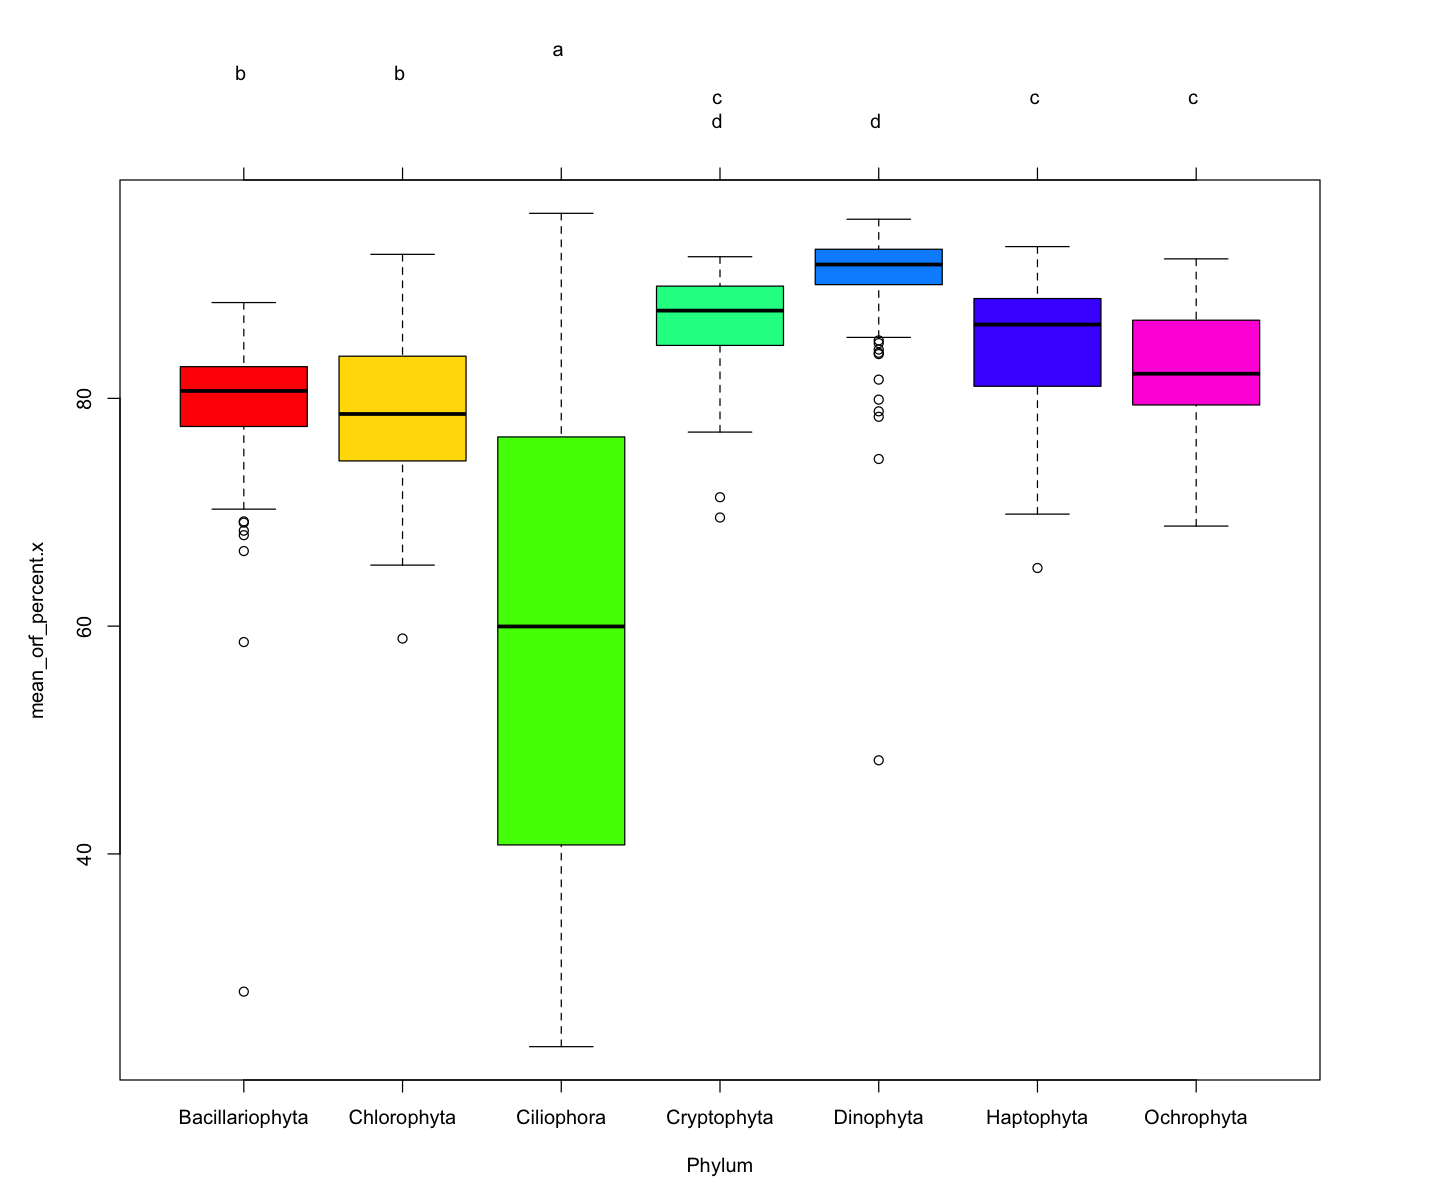

In [21]:
tuk.cld<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
plot(tuk.cld,col=rainbow(length(unique(sub$Phylum))))